# 39일차

## 자연어 처리 딥러닝
### RNN (순환신경망) 과 LSTM
- 연속된 데이터 묶음을 처리한다.
-하나의 데이터 묶음은 순서를 가진다. (앞과 뒤를 구분)
-이러한 데이터 묶음을 시퀀스(Sequence) 또는 시계열데이터 라고 한다.
-연속된 단어들로 이루어진 문장, 몇일 간의 종가로 이루어진 주식 가격 등
-RNN : Recurrent Neural Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

### IMDb 데이터

In [2]:
from tensorflow.keras.datasets import imdb

In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\hanhe\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\hanhe\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [5]:
w2i = imdb.get_word_index()
len(w2i)

88584

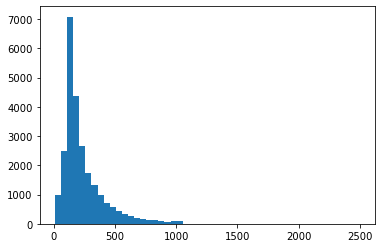

In [6]:
doc_len = [len(x) for x in X_train]
plt.hist(doc_len, bins=50)
pass

In [7]:
from tensorflow.keras.preprocessing import sequence

X_train = sequence.pad_sequences(X_train, maxlen=500) # 문장당 단어수가 500개를 넘기면 앞부분을 자른다
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

In [9]:
model = Sequential()
model.add(Embedding(10000, 32, input_length=500))
model.add(SimpleRNN(64))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 64)                6208      
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 326,273
Trainable params: 326,273
Non-trainable params: 0
_________________________________________________________________


In [11]:
32*64 + 64*64 + 64 # SimpleRNN 가중치 수

6208

In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=2, batch_size=128, validation_split=0.2)

Epoch 1/2
157/157 [==============================] - 20s 124ms/step - loss: 0.6901 - acc: 0.5338 - val_loss: 0.6497 - val_acc: 0.6350
Epoch 2/2
157/157 [==============================] - 21s 133ms/step - loss: 0.4980 - acc: 0.7692 - val_loss: 0.4142 - val_acc: 0.8140


In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 22s 133ms/step - loss: 0.2881 - acc: 0.8832 - val_loss: 0.3532 - val_acc: 0.8524
Epoch 2/10
157/157 [==============================] - 22s 139ms/step - loss: 0.1952 - acc: 0.9234 - val_loss: 0.3765 - val_acc: 0.8498
Epoch 3/10
157/157 [==============================] - 21s 132ms/step - loss: 0.1331 - acc: 0.9520 - val_loss: 0.4891 - val_acc: 0.8388
Epoch 4/10
157/157 [==============================] - 23s 144ms/step - loss: 0.0889 - acc: 0.9723 - val_loss: 0.4978 - val_acc: 0.8474
Epoch 5/10
157/157 [==============================] - 22s 141ms/step - loss: 0.0316 - acc: 0.9915 - val_loss: 0.5698 - val_acc: 0.8366
Epoch 6/10
157/157 [==============================] - 22s 141ms/step - loss: 0.0169 - acc: 0.9967 - val_loss: 0.6497 - val_acc: 0.8134
Epoch 7/10
157/157 [==============================] - 22s 141ms/step - loss: 0.0648 - acc: 0.9776 - val_loss: 0.6576 - val_acc: 0.8142
Epoch 8/10
157/157 [==============================] - 2

Text(6, 0.87, 'val_acc_max = 0.852400004863739')

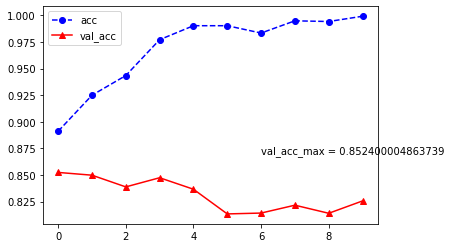

In [14]:
h = history.history
plt.plot(h['acc'], 'bo--')
plt.plot(h['val_acc'], 'r^-')
plt.legend(['acc', 'val_acc'])
plt.text(6,0.87,'val_acc_max = '+ str(max(h['val_acc'])))

Text(3, 0.3, 'val_loss_min = 0.35318660736083984')

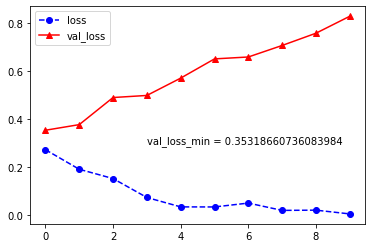

In [15]:
plt.plot(h['loss'], 'bo--')
plt.plot(h['val_loss'], 'r^-')
plt.legend(['loss', 'val_loss'])
plt.text(3,0.3,'val_loss_min = '+ str(min(h['val_loss'])))

In [16]:
model = Sequential()
model.add(Embedding(10000, 32, input_length=500))
model.add(SimpleRNN(32, return_sequences=True)) # return_sequences=True!!!
model.add(SimpleRNN(16, return_sequences=True)) # return_sequences=True!!!
model.add(SimpleRNN(16))
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 500, 32)           2080      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 500, 16)           784       
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 16)                528       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 323,409
Trainable params: 323,409
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 47s 288ms/step - loss: 0.6908 - acc: 0.5430 - val_loss: 0.4887 - val_acc: 0.8046
Epoch 2/10
157/157 [==============================] - 45s 284ms/step - loss: 0.3992 - acc: 0.8252 - val_loss: 0.4442 - val_acc: 0.8128
Epoch 3/10
157/157 [==============================] - 44s 281ms/step - loss: 0.2713 - acc: 0.8937 - val_loss: 0.3879 - val_acc: 0.8422
Epoch 4/10
157/157 [==============================] - 44s 282ms/step - loss: 0.1705 - acc: 0.9387 - val_loss: 0.5447 - val_acc: 0.7782
Epoch 5/10
157/157 [==============================] - 44s 282ms/step - loss: 0.0847 - acc: 0.9722 - val_loss: 0.5599 - val_acc: 0.8184
Epoch 6/10
157/157 [==============================] - 44s 280ms/step - loss: 0.0363 - acc: 0.9892 - val_loss: 0.6763 - val_acc: 0.8028
Epoch 7/10
157/157 [==============================] - 44s 281ms/step - loss: 0.0241 - acc: 0.9936 - val_loss: 0.8098 - val_acc: 0.7996
Epoch 8/10
157/157 [==============================] - 4

Text(6, 0.87, 'val_acc_max = 0.842199981212616')

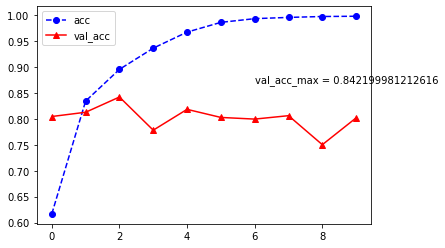

In [19]:
h = history.history
plt.plot(h['acc'], 'bo--')
plt.plot(h['val_acc'], 'r^-')
plt.legend(['acc', 'val_acc'])
plt.text(6,0.87,'val_acc_max = '+ str(max(h['val_acc'])))

Text(3, 0.3, 'val_loss_min = 0.38785699009895325')

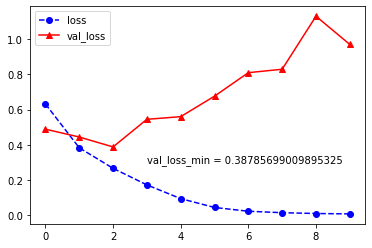

In [20]:
plt.plot(h['loss'], 'bo--')
plt.plot(h['val_loss'], 'r^-')
plt.legend(['loss', 'val_loss'])
plt.text(3,0.3,'val_loss_min = '+ str(min(h['val_loss'])))

### 그래디언트 소실 문제
- RNN 은 하나의 층에서도 반복적인 RNN Cell 을 적용하므로, 실제로는 많은 층을 거치게 된다.
-최상위의 손실값을 조금씩 아래로 나누어 주어 기울기의 가중치를 부여하는 것이 신경망의 핵심 알고리즘인 역전파(Backpropagation) 이다.
-층을 많이 거치므로 초기층들의 영향력은 점점 줄어들게 된다. 즉, 문장에서 처음 나오는 단어들은 거의 무시되는 경향이 생긴다.
-이러한 문제를 Vanishing Gradient Problem 이라고 부른다.
-그래디언트 소실 문제를 해결하기 위해 LSTM 과 GRU 가 제안되었고, SimpleRNN 은 거의 사용되지 않는다.

### LSTM 적용
- Long Short Term Memory
-그래디언트 소실 문제(Vanishing gradient problem) 을 해결하기 위해, 이전 타임의 영향력을 좀 더 키운 것이다.
-LSTM 의 역할 => 과거 정보를 나중에 다시 주입하여 그래디언트 소실 문제를 해결

In [21]:
from tensorflow.keras.layers import LSTM

In [22]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))